In [213]:
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Abstract

In this blog post, I will implement perceptron on linearly separable data, non-linearly separable data, and 5d data, as well as visualizations and comments to describe what each code block is executing. That data I wil be using is taken form the class notes and then modified to fit the criteria I listed above. I will learn and test how the perceptron algorithm works by evaluating its performance on different data forms. Some data points and visualizations are taken from the class notes so credit goes to Professor Phil! 

(Here is the link to my perceptron file, https://vscode.dev/github/lenoxherman/lenoxherman.github.io/blob/main/posts/Blog%204/perceptron.py )

# Implementing Perceptron

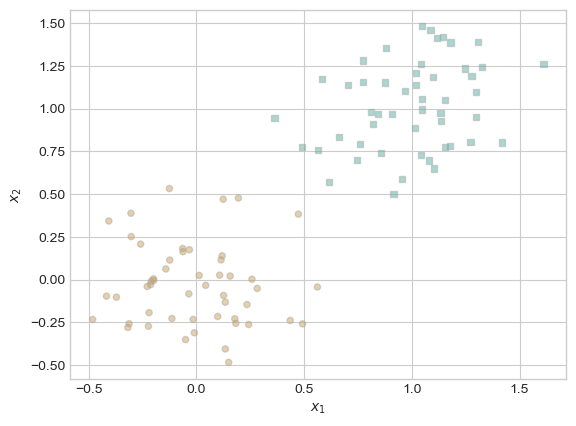

In [214]:
import torch
from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')

torch.manual_seed(12989)

def perceptron_data(n_points = 100, noise = 0.23, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)

    # convert y from {0, 1} to {-1, 1}
    y = 2*y - 1

    return X, y

X, y = perceptron_data(n_points = 100, noise = 0.2)

def plot_perceptron_data(X, y, ax):
    assert X.shape[1] == 3, "This function only works for data created with p_dims == 2"
    targets = [-1, 1]
    markers = ["o" , ","]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(X[ix,0], X[ix,1], s = 20,  c = y[ix], facecolors = "none", edgecolors = "darkgrey", cmap = "BrBG", vmin = -2, vmax = 2, alpha = 0.5, marker = markers[i])
    ax.set(xlabel = r"$x_1$", ylabel = r"$x_2$")

fig, ax = plt.subplots(1, 1)
X, y = perceptron_data()
plot_perceptron_data(X, y, ax)

Here is example code taken from a warmup, that shows linear separable data. I will then run my implemented perceptron on this data. Look into my perceptron python file to find where I implemented my own grad and step functions.

In [215]:
from perceptron import Perceptron,perceptron_data, PerceptronOptimizer
import torch

# instantiate a model and an optimizer
p = Perceptron() 
opt = PerceptronOptimizer(p)

loss = 1.0

# for keeping track of loss values
loss_vec = []

n = X.size()[0]

while loss > 0: # only terminates if data is linearly separable
    
    # not part of the update: just for tracking our progress    
    loss = p.loss(X, y) 
    loss_vec.append(loss)

    # pick a random data point
    i = torch.randint(n, size = (1,))
    x_i = X[[i],:]
    y_i = y[i]

    # perform a perceptron update using the random data point
    opt.step(x_i, y_i)

To test out my implementation of perceptron, I ran a minimal training loop using the data from above.

In [216]:
y
p.predict(X)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

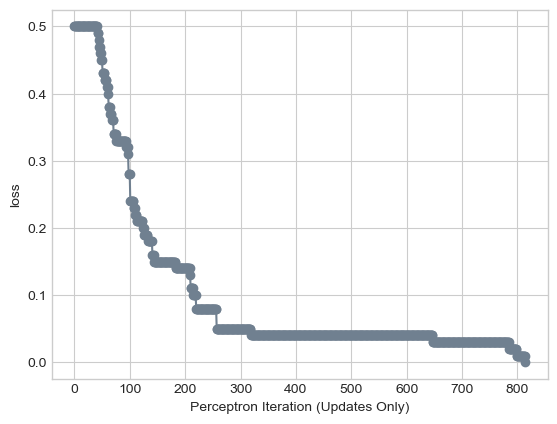

In [217]:
plt.plot(loss_vec, color = "slategrey")
plt.scatter(torch.arange(len(loss_vec)), loss_vec, color = "slategrey")
labs = plt.gca().set(xlabel = "Perceptron Iteration (Updates Only)", ylabel = "loss")

The graph above shows the steps of my implemented algorithm as the loss approaches 0. After a little over 1400, the loss is at 0! 

In [218]:
def accuracy(X, y):

    predictions = p.predict(X)
    
    predictions = 2*predictions - 1
    
    preds = (predictions == y).float()
    accuracy = torch.mean(preds)

    print(f"Accuracy: {accuracy.item()}")
accuracy(X, y)

Accuracy: 1.0


The function above test the accuracy of our model and as seen above we have 100% accuracy! 

# Visualizations

We use the data from minimal training loop to show the line that linear seperates the data.

Text(0.5, 1.0, 'Final Decision Boundary')

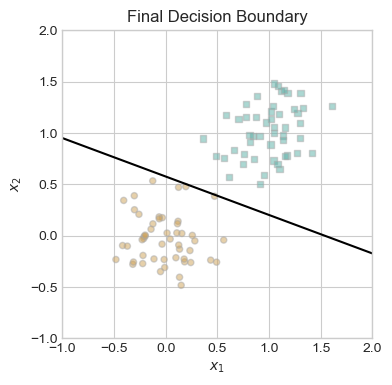

In [219]:
def draw_line(w, x_min, x_max, ax, **kwargs):
    w_ = w.flatten()
    x = torch.linspace(x_min, x_max, 101)
    y = -(w_[0]*x + w_[2])/w_[1]
    l = ax.plot(x, y, **kwargs)

fig, ax = plt.subplots(1, 1, figsize = (4, 4))
ax.set(xlim = (-1, 2), ylim = (-1, 2))
plot_perceptron_data(X, y, ax)
draw_line(p.w, -1, 2, ax, color = "black")
plt.title("Final Decision Boundary")

This code was taken from the notes, and draws a line between the two sets of points.

### Implementing Perceptron on Data that is not Linearly Separable

I made a new plot below that has overlapping points, so the data is no longer linear separable

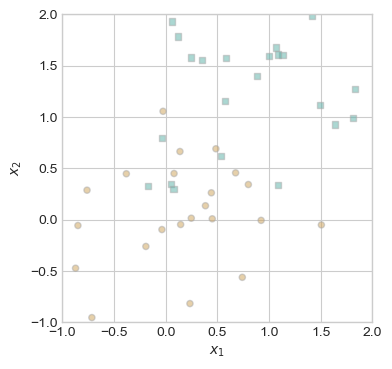

In [220]:
X, y = perceptron_data(n_points = 50, noise = 0.7)
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
ax.set(xlim = (-1, 2), ylim = (-1, 2))
plot_perceptron_data(X, y, ax)

Here the line seperating the two data sets, isn't very accurate and doesn't do a good job splitting up the data

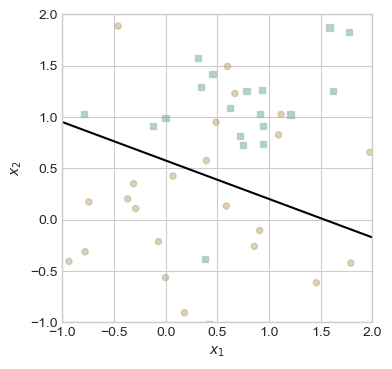

In [221]:
X, y = perceptron_data(n_points = 50, noise = 0.7)
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
ax.set(xlim = (-1, 2), ylim = (-1, 2))
plot_perceptron_data(X, y, ax)

draw_line(p.w, -1, 2, ax, color = "black")

We can from the visualizations above, that the data is not linearly separable, and its impossible to draw a line that splits the two datasets

In [222]:
from perceptron import Perceptron,perceptron_data, PerceptronOptimizer
import torch

p = Perceptron() 
opt = PerceptronOptimizer(p)

# for keeping track of loss values
loss_vec = []


loss = 1.0
max_iterations = 1000

n = X.size()[0]

while loss > 0  and max_iterations > 0: 
    
    # not part of the update: just for tracking our progress    
    loss = p.loss(X, y) 
    loss_vec.append(loss)
    
    # pick a random data point
    i = torch.randint(n, size = (1,))
    x_i = X[i,:].squeeze()
    y_i = y[i]

    
    # perform a perceptron update using the random data point
    opt.step(x_i, y_i)
    max_iterations -= 1

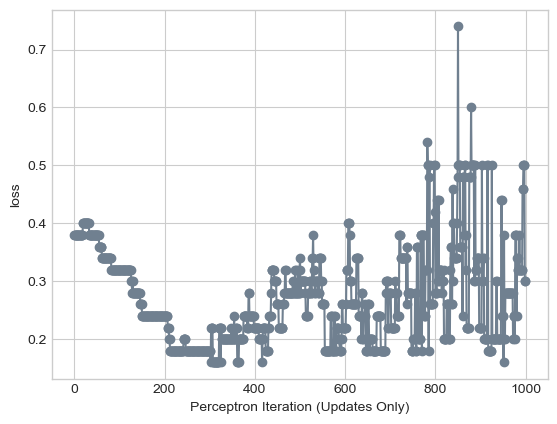

In [223]:
plt.plot(loss_vec, color = "slategrey")
plt.scatter(torch.arange(len(loss_vec)), loss_vec, color = "slategrey")
labs = plt.gca().set(xlabel = "Perceptron Iteration (Updates Only)", ylabel = "loss")

Above is a graph, once again mapping the loss as it approaches 0. This time after 1000 iterations, the loss ossilates a lot, and never converges at 0.

### Implementing Perceptron on Data that is not 2D 


This code will run perceptron on 5D data. 

In [224]:
torch.manual_seed(1234)

def perceptron_data(n_points = 300, noise = 0.2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,5))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)

    # convert y from {0, 1} to {-1, 1}
    y = 2*y - 1

    return X, y

X, y = perceptron_data(n_points = 300, noise = 0.35)

In [225]:
X, y = perceptron_data()
p = Perceptron() 
opt = PerceptronOptimizer(p)

# for keeping track of loss values
loss_vec = []
max_iterations = 1000

loss = 1.0

n = X.size()[0]

while loss > 0  and max_iterations > 0: 
    
    # not part of the update: just for tracking our progress    
    loss = p.loss(X, y) 
    loss_vec.append(loss)
    
    # pick a random data point
    i = torch.randint(n, size = (1,))
    x_i = X[i,:].squeeze()
    y_i = y[i]

    
    # perform a perceptron update using the random data point
    opt.step(x_i, y_i)
    max_iterations -= 1

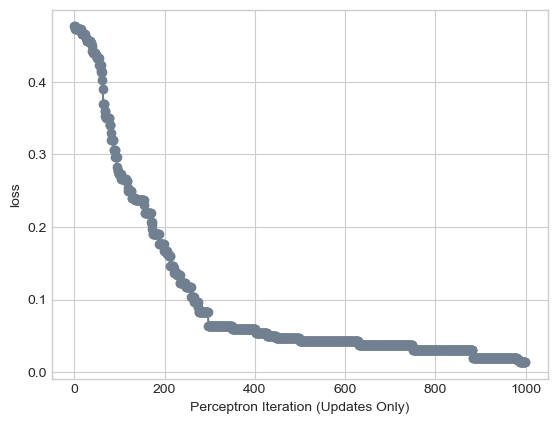

In [226]:
plt.plot(loss_vec, color = "slategrey")
plt.scatter(torch.arange(len(loss_vec)), loss_vec, color = "slategrey")
labs = plt.gca().set(xlabel = "Perceptron Iteration (Updates Only)", ylabel = "loss")


After 1000 iterations, the loss is almost at 0!

In [227]:
accuracy(X, y)

Accuracy: 0.9866666793823242


With 5D data, after 1000 iterations the loss is almost at 0 and our accuracy is at 98.6%, which is almost 1000, very similar to when we implemented perceptron on not linearly separable data. 

# Conclusion
In this blog, I coded my own version of the perceptron algorithm, which is provided in the attached Python file. Testing this implementation on linearly separable data revealed that the loss approached 0, indicating successful classification. However, when applying the algorithm to non-linearly separable data, it became evident that convergence might never occur, potentially causing the algorithm to run indefinitely. To address this issue, I introduced a maximum iteration limit to prevent infinite execution. Despite this limitation, the accuracy achieved was nearly 100%. Nevertheless, it's important to note that the perceptron algorithm may not achieve perfect separation between the two datasets. Furthermore, I extended the application of the perceptron to 5D data, achieving a loss of 0 once again. Overall, my implementation of the perceptron algorithm proved successful across all three types of datasets.